# Coarsening process in Cahn-Hilliard equation

## The continuum hypothesis

Let us consider a box of fluid with size $L_x\times L_y\times L_z$ (see figure below).
The volume of the system is $V=L_x L_y L_z$.

__Continuum hypothesis.__ 
We assume that we can divide the system into many many small volume elements $dV$'s, such that each volume element $dV$ contains a large number of molecules $\sim10^{23}$, but $dV$ is still small compared to the overall system volume $V=L_xL_yL_z$ . 
We can then define the hydrodynamic variable $\rho(\mathbf{r},t)$, which is the mass density of the fluid.
Physically, $\rho(\mathbf{r},t)$ is defined such that:
\begin{equation} 
\rho(\mathbf{r},t)\,dV = \text{mass of the fluid inside the volume element $dV$, located at $\mathbf{r}$ and at time $t$}.
\end{equation}
So if we want to find the total mass of the fluid, we integrate $\rho(\mathbf{r},t)$ over the whole system.
In the figure below, the volume elements  $dV$'s are represented by pixels and the colour of this pixel represents the value of the fluid density $\rho(\mathbf{r},t)$ at that point.
In fluids, there are also other hydrodynamic variables of interest such as pressure $p(\mathbf{r},t)$ and fluid velocity $\mathbf{u}(\mathbf{r},t)$, but we will not worry about these in this chapter.


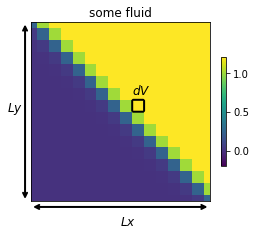

In [3]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-coarsening/master/figures/density-field.png')


We consider the following problems involving phase separation:
1. Two-phase, one-component systems, _e.g._, liquid water and water vapour phase separation
2. One-phase, two-component systems, _e.g._, liquid water and liquid oil phase separation.

For both cases, the phase-separation dynamics can be described by a single scalar order parameter $\phi(\mathbf{r},t)$ (which is sometimes also called the rescaled density).

For Case 1, $\phi(\mathbf{r},t)$ is defined to be the rescaled density, relative to the critical density $\rho_c$:
\begin{equation}
\phi(\mathbf{r},t) = \frac{\rho(\mathbf{r},t) - \rho_c}{\rho_c}.
\end{equation}
In the above equation, $\rho(\mathbf{r},t)$ is the mass density of the fluid (which can be gas/liquid/both) at position $\mathbf{r}$ and at time $t$,
and $\rho_c$ is the density of the fluid at the critical point.
Basically, below the critical temperature, the liquid phase has density $\rho(\mathbf{r},t)\simeq\rho_l$ and the gas phase has density $\rho(\mathbf{r},t)\simeq\rho_g<\rho_l$.
As we approach the critical temperature, the density difference between the liquid and the gas phase goes to zero, _i.e._ $\rho_l-\rho_g\rightarrow 0$.
Finally beyond the critical point, there is no distinction between liquid and gas.
Thus from the definition of $\phi(\mathbf{r},t)$ above, $\phi(\mathbf{r},t)>0$ corresponds to the liquid phase and $\phi(\mathbf{r},t)<0$ corresponds to the gas phase.

For Case 2, $\phi(\mathbf{r},t)$ is defined to be the relative densities between the two molecules, say A and B:
\begin{equation}
\phi(\mathbf{r},t) = \frac{2\rho(\mathbf{r},t) - \rho_A - \rho_B}{\rho_A - \rho_B}.
\end{equation}
In the above equation $\rho_A$ is the density of pure A molecules and $\rho_B$ is the density of the pure B molecules.
Thus from the definition above, $\phi(\mathbf{r},t)\simeq 1$ indicates that the fluid contains pure A molecules and $\phi(\mathbf{r},t)\simeq-1$ indicates that the fluid contains pure B molecules.

By conservation of mass and assuming that there is no chemical reaction $A\leftrightarrow B$, it follows that the integral:
\begin{equation}
\phi_0 = \frac{1}{V} \underbrace{\int_V dV \, \phi(\mathbf{r},t)}_{\text{total amount of fluid}} = \text{constant}.
\end{equation}
We call the constant $\phi_0$ to be the global density, which is fixed by the initial condition.

__Local equilibrium hypothesis.__ 
We assume each fluid element $dV$ to be in a state of thermodynamic equilibrium _locally_ with a given temperature, entropy, internal energy, pressure, chemical potential, _etc_.
Note that this does not mean that the whole system is in a state of _global_ thermodynamic equilibrium because a fluid element $dV$ at $\mathbf{r}$ might have a different pressure or chemical potential compared to the fluid element $dV$ at $\mathbf{r}'$.
However over time, if we leave the system to sit long enough, energy and mass can be exchanged between different fluid elements $dV$'s until a global thermodynamic equilibrium is reached.

Since each fluid element $dV$ is in thermodynamic equilibrium locally, we can define the free energy of this fluid element to be:
\begin{equation}
g(\phi,\nabla\phi)\,dV = \text{free energy of the fluid element $dV$, located at $\mathbf{r}$ and at time $t$}.
\end{equation}
We call $g(\phi,\nabla\phi)$ to be the free energy density.
In general $g$ depends on the order parameter $\phi$ and its gradient $\nabla\phi$.
Landau and Ginzburg's idea is to Taylor expand $g$ around the critical point.
At the critical point $\phi=0$ and thus we can expand $g$ for small $\phi$:
\begin{equation}
g(\phi,\nabla\phi) = \underbrace{\frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4}_{\text{local}} + \underbrace{\frac{\kappa}{2}|\nabla\phi|^2}_{\text{semi-local}}.
\end{equation}
Note that, we have ignored the cubic term $~\phi^3$, because we can redefine $\phi$ to eliminate this cubic term, making it unnecessary.
We have also ignored the linear term $~\phi$ because this does not contribute the dynamics, as we shall see below.
Finally, $\sim|\nabla\phi|^2$ is the smallest scalar term we can form using $\nabla$ and $\phi$. 
Note that the first two terms above are purely local as they only depend on $\phi$.
The last term in the equation above is semi-local, because it depends on the gradient $\nabla\phi$.
This means to calculate the last term in the equation above, we need some information about the neighbouring fluid elements $dV$'s.

__Coarse graining.__
When we did the Landau expansion, _i.e._ Taylor expansion around $\phi=0$ above, we get various phenomenological parameters such as $\alpha$ and $\beta$, which are unknown.
In this section, we will investigate how to derive these parameters from microscopic models through _coarse-graining_.
Let us consider some fluid, as shown in the figure on the left below.
Yellow indicates the liquid phase ($\phi\simeq1$) while dark blue indicates the gas phase ($\phi\simeq-1$).

As before, we can divide the system into many many volume elements $dV$'s.
Let us just consider one such volume element $dV$, which is indicated by dark square in the figure below.
Inside this volume element, we have a large number of molecules, which are indicated by the blue discs in the figure on the right below.
Let us denote $N_p$ to be the number of particles/fluid molecules, _e.g._ $\text{H}_2\text{O}$, inside the volume element $dV$.
(In the figure we have $N_p=36$ particles for illustration purposes, but in reality $N_p\sim10^{23}$.)
Let us suppose that we can further divide the volume element $dV$ into $N$ lattice cells, as shown in the figure on the right below.
(In the figure, $N=8\times8=64$, but in reality, $N\sim10^{23}$.)
Each cell has a volume $a^3$, which is even smaller than $dV$, and $a$ is the typical size of the molecule.
Now we assume that each fluid molecule has to fit inside one of the lattice cells and cannot be on the fence.
Furthermore, each lattice cell cannot contain more than one fluid molecule due to hard-core repulsion.

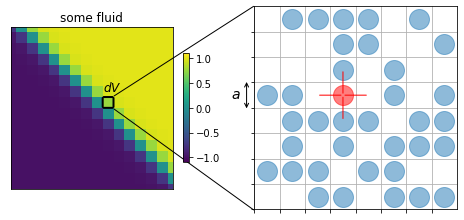

In [2]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-coarsening/master/figures/coarse-graining.png')

Now let us compute the free energy of this volume element $dV$.
The free energy is given by:
\begin{equation}
F = U - TS, \quad\text{where $U$ is the potential energy and $S$ is the entropy of this lattice system.}
\end{equation}
First let us calculate $U$.
Let us denote the interaction energy between two neighbouring molecules to be $-\varepsilon$, where $\varepsilon>0$.
The interaction energy is negative because the molecules tend to attract each other.
Now let us denote $z$ to be the number of nearest neighbour cells.
In two-dimension, $z=4$, as shown by the red lines in the figure on the right below.
Thus each fluid molecule has, on average, $z\frac{N_p}{N}$ other neighbouring molecules.
The interaction energy between the fluid molecules is then:
\begin{equation}
U = -\frac{\varepsilon z}{2}N_p\frac{N_p}{N} \quad\Rightarrow\quad 
\frac{U}{N} = -\frac{\varepsilon z}{2}\frac{N_p}{N}\frac{N_p}{N}.
\end{equation}
Note that we have added a factor of $1/2$ to avoid double counting the bonds between two neighbouring molecules.
Now to calculate the entropy, we use the Boltzmann formula:
\begin{equation}
S = k_B \ln\Omega,\quad\text{where $\Omega$ is the number of microstates.}
\end{equation}
In our case $\Omega$ is the number of arranging $N_p$ indistinguishable particles into $N$ cells:
\begin{equation}
\Omega = C^N_{N_p} = \frac{N!}{(N-N_p)!N_p!}.
\end{equation}
Thus the entropy is:
\begin{equation}
S = k_B\left[ \ln N! - \ln (N-N_p)! - \ln N_p! \right].
\end{equation}
Next we can use the Stirling's approximation $\ln N!\simeq N\ln N - N$ to get:
\begin{equation}
\frac{S}{N} = -k_B \left[ \left(1-\frac{N_p}{N}\right)\ln\left(1-\frac{N_p}{N}\right) + \frac{N_p}{N}\ln\left(\frac{N_p}{N}\right) \right]
\end{equation}
Thus the free energy (per unit cell) of this volume element is:
\begin{align}
\frac{F}{N} &= \frac{U}{N} - T\frac{S}{N} \\
&= -\frac{\varepsilon z}{2}\frac{N_p}{N}\frac{N_p}{N} +
k_BT \left[ \left(1-\frac{N_p}{N}\right)\ln\left(1-\frac{N_p}{N}\right) + \frac{N_p}{N}\ln\left(\frac{N_p}{N}\right) \right].
\end{align}
Note that the free energy per unit cell above is an intensive quantity, as expected.
From the picture below, obviously if $N_p=N$ we get a pure liquid phase and if $N_p=0$ we get a pure gas phase.
Thus at critical point, we expect $N_p=N/2$.
This motivates us to expand $F/N$ around the critical point by writing:
\begin{equation}
\frac{N_p}{N} = \frac{1}{2} + \phi,
\end{equation}
where $\phi$ is small.
The free energy per unit cell is then:
\begin{equation}
\frac{F}{N} = -\frac{\varepsilon z}{2}\left(\frac{1}{2}+\phi\right)\left(\frac{1}{2}+\phi\right) +
k_BT \left[ \left(\frac{1}{2}-\phi\right)\ln\left(\frac{1}{2}-\phi\right) + \left(\frac{1}{2}+\phi\right)\ln\left(\frac{1}{2}+\phi\right) \right]
\end{equation}
Next we expand the logarithm as power series up to order $\phi^4$:
\begin{equation}
\ln\left(\frac{1}{2}\pm\phi\right) = -\ln2 \pm 2\phi - 2\phi^2 \pm \frac{8}{3}\phi^3 - 4\phi^4 \dots.
\end{equation}
We can then expand $F/N$ up to order $\phi^4$:
\begin{equation}
\frac{F}{N} = -\frac{z\varepsilon}{2}\phi + \left(2k_BT - \frac{z\varepsilon}{2}\right)\phi^2 + \frac{4k_BT}{3}\phi^4 + \mathcal{O}(\phi^6).
\end{equation}
Note that we have ignored the constant terms in the equation above.
Furthermore, we can also ignore the linear term $\propto\phi$ as this does not affect the $\dot{\phi}$-dynamics as we shall see below.
To find the free energy density, we can then divide $F/N$ by the volume of the lattice cell $a^3$ to get:
\begin{equation}
g(\phi) = \frac{F}{Na^3} = \underbrace{\left(\frac{2k_BT}{a^3} - \frac{z\varepsilon}{2a^3}\right)}_\alpha\phi^2 + 
\underbrace{\frac{4k_BT}{3a^3}}_\beta\phi^4 + \mathcal{O}(\phi^6).
\end{equation}
If we compare with the Landau-Ginzburg free energy density $g(\phi,\nabla\phi)$, we identify the $\phi^2$ and $\phi^4$ coefficients to be:
\begin{equation}
\alpha = \frac{2k_BT}{a^3} - \frac{z\varepsilon}{2a^3} \quad\text{and}\quad \beta = \frac{4k_BT}{3a^3},
\end{equation}
respectively.
Note that $\beta$ is always positive, whereas $\alpha$ becomes negative when:
\begin{equation}
T < \frac{z\varepsilon}{4k_B} = T_c.
\end{equation}
We call the right hand side the critical temperature $T_c$, below which, phase separation can occur (for a given range of $\phi_0$).
If $T>T_c$, the coefficient of $\phi^2$ in the free energy is always positive, and the system remains homogenously mixed, and there is no phase separation into liquid or gas.
Finally, we should also note that we did not the get the gradient term $\sim|\nabla\phi|^2$ through coarse-graining.
This term has to be added phenomenologically with some unknown coefficient $\kappa>0$.

## Coarse-grained free energy

The total coarse-grained free energy of the system can then be written as:
\begin{equation}
\mathcal{F}[\phi] = \int_V dV \bigg[ \underbrace{\frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4}_{f(\phi)} + \frac{\kappa}{2}|\nabla\phi|^2 \bigg],
\end{equation}
where $f(\phi)$ is the local free energy density term
and $\frac{\kappa}{2}|\nabla\phi|^2$ is a semi-local free energy density term.
$\beta$ and $\kappa$ are positive constants.
$\alpha$ can be positive or negative.
If $\alpha<0$, then the system will favour phase separation into the liquid $\phi\simeq\sqrt{\frac{-\alpha}{\beta}}$ and vapour phase $\phi\simeq-\sqrt{\frac{-\alpha}{\beta}}$.
On the other hand if $\alpha>0$, the system will remain in a homogenous phase with $\phi=\phi_0$ everywhere.
The reason for this has something to do with the shape of the local (or bulk) free energy density $f(\phi)$, as you can see below.
For $\alpha<0$, the local (or bulk) free energy density $f(\phi)$ has two minima at $\phi=\pm\sqrt{\frac{-\alpha}{\beta}}$.

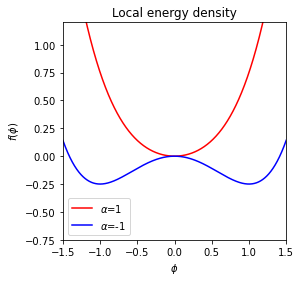

In [8]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-coarsening/master/figures/Landau-energy.png')

The _global_ equilibrium state is given by the minimum of the total free energy $\mathcal{F}[\phi]$, _i.e_,
\begin{equation}
\frac{\delta \mathcal{F}}{\delta\phi} = 0,
\end{equation}
subject to the constraint
\begin{equation}
\phi_0 = \frac{1}{V} \int_V dV \, \phi(\mathbf{r},t) = \text{constant}.
\end{equation}
There are two equilibrium states:
1. Homogenous state, where the density is constant everywhere $\phi(\mathbf{r},t)=\phi_0=$ constant.
2. Droplet state, where the system is separated into two domains with density $\phi\simeq+\sqrt{\frac{-\alpha}{\beta}}$ and $\phi\simeq-\sqrt{\frac{-\alpha}{\beta}}$ in each domain.

The control parameters in our system are $\alpha$ and $\phi_0$.
Depending on the values of $\alpha$ and $\phi_0$, the equilibrium state of the system can either be the homogenous state or the droplet state.

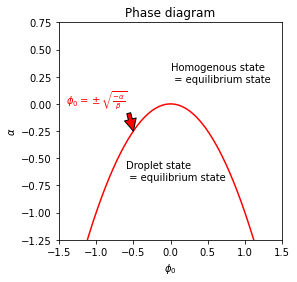

In [9]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-coarsening/master/figures/equilibrium-phase-diagram.png')

## Functional derivative

Let us consider some functional $\mathcal{F}[\phi(\mathbf{r})]$, which in general, can be written as:
\begin{equation}
\mathcal{F}[\phi] = \int_V g(\phi,\partial_\alpha\phi)\,dV.
\end{equation}
In the above equation, $g(\phi,\partial_\alpha\phi)$ is some function of $\phi$ and its derivative $\partial_\alpha\phi$.
Here the index $\alpha=x,y,z$ represents the Cartesian coordinates.
We also use the following notation for partial derivatives $\partial_x=\frac{\partial}{\partial x}$, $\partial_y=\frac{\partial}{\partial y}$, and $\partial_z=\frac{\partial}{\partial z}$.
In the case of our energy, $g$ is given by:
\begin{equation}
g(\phi,\partial_\alpha\phi) = \frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4 + \frac{\kappa}{2}(\partial_\alpha\phi)(\partial_\alpha\phi).
\end{equation}
Here, we have used the repeated index notation, _i.e_ summation over that index is implied so the last term in the above equation is implied to be:
\begin{equation}
(\partial_\alpha\phi)(\partial_\alpha\phi) =
(\partial_x\phi)^2 + (\partial_y\phi)^2 + (\partial_z\phi)^2 = |\nabla\phi|^2
\end{equation}

Now let us consider some density field $\phi(\mathbf{r})$.
Let's suppose that we add some perturbation to the density field such that 
$\phi(\mathbf{r})\rightarrow\phi(\mathbf{r}) + \delta\phi(\mathbf{r})$,
where $\delta\phi$ is a small perturbation.
And we also suppose that $\delta\phi$ vanishes at the boundary (_i.e._ the surface of the box).
We want to calculate the change in the total energy due to this perturbation:
\begin{align}
\delta \mathcal{F} &= \mathcal{F}[\phi+\delta\phi] - \mathcal{F}[\phi] \\
&= \int_V g(\phi+\delta\phi,\partial_\alpha\phi+\partial_\alpha\delta\phi)\,dV - \int_V g(\phi,\partial_\alpha\phi)\,dV
\end{align}
Next we take Taylor series for the first term to get:
\begin{align}
\delta \mathcal{F}
&= \int_V g(\phi+\delta\phi,\partial_\alpha\phi+\partial_\alpha\delta\phi)\,dV - 
\int_V g(\phi,\partial_\alpha\phi)\,dV \\
&= \int_V \left\{ g(\phi,\partial_\alpha\phi) + \frac{\partial g}{\partial\phi}\delta\phi + 
\frac{\partial g}{\partial(\partial_\alpha\phi)}\partial_\alpha(\delta\phi) \right\} \,dV - 
\int_V g(\phi,\partial_\alpha\phi)\,dV \\
&= \int_V \left\{ \frac{\partial g}{\partial\phi}\delta\phi + \frac{\partial g}{\partial(\partial_\alpha\phi)}\partial_\alpha(\delta\phi) \right\}dV
\end{align}
Using product rule (or integration by parts), we can write:
\begin{equation}
\frac{\partial g}{\partial(\partial_\alpha\phi)}\partial_\alpha(\delta\phi)
= \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\delta\phi\right) - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)\delta\phi
\end{equation}
Thus, $\delta \mathcal{F}$ becomes:
\begin{align}
\delta \mathcal{F} = \int_V \left\{ \frac{\partial g}{\partial\phi}\delta\phi \right\}dV + \int_V \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\delta\phi\right)dV - \int_V \left\{ \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)\delta\phi \right\}dV
\end{align}
For the second term, we can use divergence theorem:
\begin{equation}
\int_V \partial_\alpha J_\alpha\,dV = \oint_S J_\alpha\,dS_\alpha,
\end{equation}
where $S$ is the surface bounding the volume $V$.
So we end up with:
\begin{align}
\delta \mathcal{F} &= \int_V \left\{ \frac{\partial g}{\partial\phi}\delta\phi \right\}dV + \underbrace{\oint_S \left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\delta\phi\right)dS_\alpha}_{=0} - \int_V \left\{ \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)\delta\phi \right\}dV \\
&= \int_V \bigg\{ \underbrace{\frac{\partial g}{\partial\phi} - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)}_{\delta \mathcal{F}/\delta\phi(\mathbf{r})} \bigg\}\delta\phi\,dV 
\end{align}
The surface integral above vanishes since $\delta\phi$ vanishes at the boundary.
The functional derivative of $\mathcal{F}$ with respect to $\phi(\mathbf{r})$ is defined to be the terms inside the curly brackets:
\begin{equation}
\frac{\delta \mathcal{F}}{\delta\phi(\mathbf{r})} = \frac{\partial g}{\partial\phi} - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right).
\end{equation}
The functional derivative is like a generalization of the regular derivative.
When the total energy is minimum (or maximum), the functional derivative of that energy must be equal to zero:
\begin{equation}
\frac{\delta \mathcal{F}}{\delta\phi} = 0.
\end{equation}


## Dynamics

The chemical potential $\mu(\mathbf{r},t)$ is defined to be the energy cost of adding a particle locally at $\mathbf{r}$. 
Mathematically, it can be written as:
\begin{equation}
\mu = \frac{\delta \mathcal{F}}{\delta\phi}.
\end{equation}
Using the formula for functional derivative above, we can calculate:
\begin{equation}
\mu = \frac{\partial g}{\partial\phi} - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right) 
= \alpha\phi + \beta\phi^3 - \kappa\underbrace{\partial_\alpha\partial_\alpha\phi}_{\nabla^2\phi}
\end{equation}
Note that:
\begin{equation}
\partial_\alpha\partial_\alpha = \partial_x^2 + \partial_y^2 + \partial_z^2 = \nabla^2 
\end{equation}

Since the total amount of fluid in the system is conserved, the dynamics of $\phi(\mathbf{r},t)$ must follow the continuity equation:
\begin{equation}
\frac{\partial\phi}{\partial t} + \nabla\cdot\mathbf{J} = 0,
\end{equation}
where $\mathbf{J}$ is the current.
To see this, we can integrate the continuity equation over the whole box to get:
\begin{align}
\frac{d}{dt}\int_V\phi\,dV + \int_V \nabla\cdot\mathbf{J}\,dV &= 0 \\
\frac{d}{dt}\int_V\phi\,dV + \underbrace{\oint_S \mathbf{J}\cdot\hat{\mathbf{n}}\,dS}_{=0} &= 0,
\end{align}
where we have used the divergence theorem on the second term.
$S$ is the surface covering the boundary of the box.
Now since we have periodic boundary condition on each side of the box, the second term in the equation above vanishes
so we end up with:
\begin{equation}
\frac{d}{dt}\int_V\phi\,dV  = 0 
\quad\Rightarrow\quad 
\int_V\phi\,dV  = \text{constant},
\end{equation}
which implies the total amount of fluid is conserved.

Finally, the current is given by:
\begin{equation}
\mathbf{J} = -M\nabla\mu,
\end{equation}
_i.e._, particles diffuse from regions with high chemical potential to regions with low chemical potential.
$M>0$ is called the mobility.
Thus the dynamics can also be written as:
\begin{equation}
\frac{\partial\phi}{\partial t} = M\nabla^2\mu.
\end{equation}
Now let us consider the rate of change of the total free energy $\mathcal{F}$:
\begin{align}
\frac{d\mathcal{F}}{dt} = \frac{d}{dt} \int_V g(\phi,\partial_\alpha\phi)\,dV 
=  \int_V \frac{\partial}{\partial t}g(\phi,\partial_\alpha\phi)\,dV.
\end{align}
Next using chain rule, we get:
\begin{align}
\frac{d\mathcal{F}}{dt} &= \int_V \left\{ \frac{\partial g}{\partial\phi}\frac{\partial\phi}{\partial t} + \frac{\partial g}{\partial(\partial_\alpha\phi)}\partial_\alpha\left(\frac{\partial\phi}{\partial t}\right) \right\} dV \\
&= \int_V \bigg\{ \underbrace{\frac{\partial g}{\partial\phi} - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)}_{=\mu} \bigg\}\underbrace{\frac{\partial\phi}{\partial t}}_{=M\nabla^2\mu} \,dV,
\end{align}
where we have used integration by parts again and the surface integral term vanishes (similar to previous section).
Finally, we substitute the dynamics to get:
\begin{align}
\frac{d\mathcal{F}}{dt} = M\int_V \mu\nabla^2\mu\,dV = -M\int_V \nabla\mu\cdot\nabla\mu\,dV \le 0,
\end{align}
where we have used the integration by parts again.
Thus we have shown that $\frac{d\mathcal{F}}{dt}$ is always negative as long as the dynamics follows $\dot{\phi}=\nabla^2\mu$ and $M\ge0$.
In other words the dynamics $\dot{\phi}=\nabla^2\mu$ will guarantee that the total energy always decreases with time until the minimum (equilibrium state) is reached.

## Linear stability of the homogenous state

The dynamics for $\phi(\mathbf{r},t)$ can be now written as:
\begin{equation}
\frac{\partial\phi}{\partial t} = M\nabla^2\left[\alpha\phi + \beta\phi^3 - \kappa\nabla^2\phi \right]
\end{equation}
Suppose we write the density field as follows:
\begin{equation}
\phi(\mathbf{r},t) = \phi_0 + \delta\phi(\mathbf{r},t), 
\end{equation}
where $\delta\phi(\mathbf{r},t)$ is a small fluctuation around the homogenous state $\phi=\phi_0$.
We are interested in whether the fluctuations will grow or decay as the time $t$ increases.
To do this, we substitute $\phi=\phi_0+\delta\phi$ into the dynamics to get:
\begin{equation}
\frac{\partial\delta\phi}{\partial t} = M\nabla^2\left[(\alpha + 3\beta\phi_0^2)\delta\phi - \kappa\nabla^2\delta\phi \right].
\end{equation}
Note that we have neglected small terms of order $\sim\delta\phi^2$ and higher.
Now we write $\delta\phi(\mathbf{r},t)$ as a Fourier series:
\begin{equation}
\delta\phi(\mathbf{r},t) = \sum_{\mathbf{q}} \delta\tilde\phi_{\mathbf{q}}(t)e^{i\mathbf{q}\cdot\mathbf{r}}.
\end{equation}
$\mathbf{q}=(q_x,q_y,q_z)^T$ is the wavevector and each component of $\mathbf{q}$ is discrete:
\begin{align}
q_x &= 0, \pm\frac{2\pi}{L_x}, \pm\frac{4\pi}{L_x}, \dots \\ 
q_y &= 0, \pm\frac{2\pi}{L_y}, \pm\frac{4\pi}{L_y}, \dots \\ 
q_z &= 0, \pm\frac{2\pi}{L_z}, \pm\frac{4\pi}{L_z}, \dots \\ 
\end{align}
The summation in the Fourier series indicates summing over all discrete values of $\mathbf{q}$'s.
The Fourier series can be thought as decomposing a function $\phi(x)$, which is defined on $x\in[0,L]$, 
into standing waves $1,e^{\pm i\frac{2\pi}{L}x},e^{\pm i\frac{4\pi}{L}x},\dots$, with $\tilde{\phi}_q$ as the amplitude for each standing wave.
Substituting the Fourier series into the dynamics, a set of first order ODE:
\begin{equation}
\frac{d\delta\tilde\phi_\mathbf{q}}{dt} = -M\left[(\alpha + 3\beta\phi_0^2)q^2  + \kappa q^4 \right] \delta\tilde\phi_{\mathbf{q}},\quad\text{for each }\mathbf{q}.
\end{equation}
The solution is:
\begin{equation}
\delta\tilde\phi_{\mathbf{q}}(t) = A_\mathbf{q} e^{r(q)t},
\end{equation}
where
\begin{equation}
r(q) = M[(-\alpha - 3\beta\phi_0^2)q^2 - \kappa q^4]
\end{equation}
is the growth rate constant (here $q=|\mathbf{q}|$).
If $r(q)>0$ then the fluctuation $\delta\tilde\phi_{\mathbf{q}}$ will grow exponentially.
If $r(q)<0$ then the fluctuation $\delta\tilde\phi_{\mathbf{q}}$ will decay exponentially to zero.
Now let's consider case by case.

#### Case I: $\alpha>0$

In this case, the coefficients of $q^2$ and $q^4$ in $r(q)$ are always negative.
\begin{equation}
r(q) = M[\underbrace{(-\alpha - 3\beta\phi_0^2)}_{<0}q^2 \underbrace{- \kappa}_{<0} q^4].
\end{equation}
Therefore the growth rate is always negative
So the fluctuations decay to zero exponentially for all wavevector $\mathbf{q}$.

#### Case IIa: $\alpha>0$ and $-\sqrt{\frac{-\alpha}{3\beta}}<\phi_0<\sqrt{\frac{-\alpha}{3\beta}}$

In this case, the coefficient of $q^2$ is positive whereas the coefficient of $q^4$ is negative.
\begin{equation}
r(q) = M[\underbrace{(-\alpha - 3\beta\phi_0^2)}_{>0} q^2 \underbrace{-\kappa}_{<0} q^4].
\end{equation}
We can plot the growth rate $r(q)$ as a function of $q=|\mathbf{q}|$.
The growth rate is positive for some range of $q$. 
This indicates the fluctuations will grow exponentially with time for some values of $\mathbf{q}$.
We can also define a characteristic wavevector $q^*$ such that the growth rate is maximum.
This correponds to the initial growth lengthscale $\lambda^*=\frac{2\pi}{q^*}$.
This instability is illustrated in the numerical simulation at the bottom of this notebook.

#### Case IIb: $\alpha>0$ and $|\phi_0|>\sqrt{\frac{-\alpha}{3\beta}}$

In this case, both coefficients of $q^2$ and $q^4$ are negative in the growth rate.
Thus all fluctuations decay to zero for all $\mathbf{q}$, similar to case I.
However from the previous section, we also learnt that if $\sqrt{\frac{-\alpha}{3\beta}}<\phi_0<\sqrt{\frac{-\alpha}{\beta}}$ or
$-\sqrt{\frac{-\alpha}{\beta}}<\phi_0<\sqrt{\frac{-\alpha}{3\beta}}$, the actual equilibrium state (or lowest energy state) of the system is actually a droplet state.
However, if we initialize the system from a homogenous state $\phi(\mathbf{r},t=0)=\phi_0+\text{ small noise}$, the system will actually remain in the homogenous state, even though the homogenous state is not the lowest energy state.
We call the homogenous state to be a metastable state in this regime.
In order for the system to jump into the actual equilibrium state, we need to add a rather large perturbation in the initial condition.
For instance we may introduce a nucleus (_i.e._ a tiny droplet) into the system at the initial time.
If the size of the nucleus is larger than the critical size, the nucleus will then grow until the equilibrium state of a macroscopic droplet is reached. 
This process is called nucleation process, which is quite distinct from Case IIa.

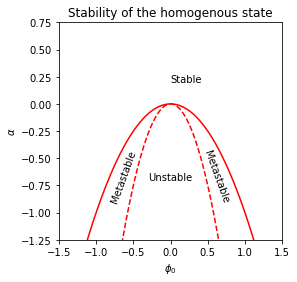

In [11]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-coarsening/master/figures/stability-phase-diagram.png')

## Numerical simulation

Let us consider a two-dimensional system. In computer simulation the space $\mathbf{r}$ is discretized into lattice with step size $\Delta x$ along the $x$-axis and $\Delta y$ along the $y$-axis.
(Ideally $\Delta x$ and $\Delta y$ have to be small.)
The coordinates $x$ and $y$ then become:
\begin{align}
x &\rightarrow i\Delta x, \quad \text{where } i = 0,1,2,\dots,N_x-1 \\
y &\rightarrow j\Delta y, \quad \text{where } j = 0,1,2,\dots,N_y-1.
\end{align}
$N_x\in\mathbb{N}$ and $N_y\in\mathbb{N}$ are the number of lattice points along $x$ and along $y$ respectively.
The system size is now $L_x\times L_y$, where $L_x = N_x \Delta x$ and $L_y = N_y \Delta y$. 
Similarly the time $t$ is also discretized into:
\begin{equation}
t \rightarrow n\Delta t, \quad \text{where } n = 0,1,2,\dots,N_t-1
\end{equation}
where $N_t\Delta t$ is total length of time that we run the simulation for.
The density field then becomes:
\begin{equation}
\phi(\mathbf{r},t) \rightarrow \phi^n_{ij}.
\end{equation}

Now we want to solve:
\begin{equation}
\frac{\partial\phi}{\partial t} = M\nabla^2\mu, \quad \text{where} \quad 
\mu = \alpha\phi + \beta\phi^3 - \kappa\nabla^2\phi.
\end{equation}
First we can write the time derivative as:
\begin{equation}
\frac{\partial\phi}{\partial t} \simeq \frac{\phi_{ij}^{n+1} - \phi_{ij}^n}{\Delta t} + \mathcal{O}(\Delta t)
\end{equation}
So the dynamics becomes:
\begin{equation}
\phi_{ij}^{n+1} = \phi_{ij}^n + \Delta t M\nabla^2 \mu_{ij}^n.
\end{equation}
So for a given initial condition $\phi_{ij}^0$ we can find $\phi$ for subsequent timesteps: $\phi_{ij}^1, \phi_{ij}^2, \dots$. 
Next we need to calculate the spatial derivatives of $\phi$ and $\mu$ in the lattice, _i.e._:
\begin{align}
\frac{\partial\phi}{\partial x} &\simeq \frac{\phi_{i+1,j} - \phi_{i-1,j}}{2\Delta x} + \mathcal{O}(\Delta x^2) \\
\frac{\partial\phi}{\partial y} &\simeq \frac{\phi_{i,j+1} - \phi_{i,j-1}}{2\Delta y} + \mathcal{O}(\Delta y^2)\\
\frac{\partial^2\phi}{\partial x^2} &\simeq \frac{\phi_{i+1,j} - 2\phi_{ij} + \phi_{i-1,j}}{\Delta x^2} + \mathcal{O}(\Delta x) \\
\frac{\partial^2\phi}{\partial y^2} &\simeq \frac{\phi_{i,j+1} - 2\phi_{ij} + \phi_{i,j-1}}{\Delta y^2} + \mathcal{O}(\Delta y) \\
\end{align}
The Laplacian is then given by:
\begin{align}
\nabla^2\phi = \frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2\phi}{\partial y^2} 
= \frac{\phi_{i+1,j} - 2\phi_{ij} + \phi_{i-1,j}}{\Delta x^2} +
  \frac{\phi_{i,j+1} - 2\phi_{ij} + \phi_{i,j-1}}{\Delta y^2} + \mathcal{O}(\Delta x) + \mathcal{O}(\Delta y).
\end{align}
In Python $\phi_{ij}$ is represented as an array:
\begin{align}
\phi &=
\begin{pmatrix}
\phi_{00} & \phi_{01} & \ldots & \phi_{0,N_y-1} \\
\phi_{10} & \phi_{11} &  & \phi_{1,N_y-1} \\
\vdots &  & \ddots & \vdots \\
\phi_{N_x-1,0} & \phi_{N_x-1,1} & \ldots & \phi_{N_x-1,N_y-1} \\
\end{pmatrix} \downarrow i\text{-direction} \\
&\quad\quad\quad\quad\quad\longrightarrow j\text{-direction}
\end{align}
Note that the $x$- and $y$-axis (or $i$- and $j$-direction) are transposed.
The array $\phi_{i+1,j}$ is then equivalent to shifting every elements inside the array $\phi_{ij}$ upwards.
This is represented by the `np.roll` function in Python:

`phi_i_plus_1 = np.roll(phi, -1, axis=0)`


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# lattice parameters
dx = 1.0  
Nx, Ny = 64, 64
dt = 0.01 
Nt = 1000000
T = int(Nt*dt)  # total length of time 

# free energy parameters
M, alpha, beta, kappa = 1.0, -1.0, 1.0, 1.0
phi0 = 0.0

# array of cartesian coordinates (needed for plotting)
x = np.arange(0, Nx)*dx
y = np.arange(0, Ny)*dx
y, x = np.meshgrid(y, x) 

# create a phi-matrix of size Nx by Ny (similarly for mu-matrix)
phi = np.zeros((Nx, Ny))  # phi at instantaneous time
phi_t = np.zeros((Nx, Ny, T))  # phi as a function of time t
mu = np.zeros((Nx, Ny))

In [12]:
# method to calculate the laplacian
def laplacian(phi):
    # axis=0 --> roll along x-direction
    # axis=1 --> roll along y-direction
    laplacianphi = (np.roll(phi,+1,axis=0) - 2.0*phi + np.roll(phi,-1,axis=0))/(dx*dx) \
                 + (np.roll(phi,+1,axis=1) - 2.0*phi + np.roll(phi,-1,axis=1))/(dx*dx)

    return laplacianphi

# create animation
def animate(phi_t):
    # initialize figure and movie objects
    fig, ax = plt.subplots(figsize=(4,4)) 

    # set label
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    # set x range and y range
    ax.set_xlim([0, Nx*dx])
    ax.set_ylim([0, Ny*dx])

    # set tick interval
    ax.tick_params(axis='both')
    ax.set_xticks(np.arange(0, Nx, 10)*dx)
    ax.set_yticks(np.arange(0, Ny, 10)*dx)

    # set aspect ratio
    ax.set_aspect('equal')

    # create colormap of phi
    colormap = ax.pcolormesh(x, y, phi_t[:,:,0], shading='auto', vmin=-1.2, vmax=1.2)
    plt.colorbar(colormap)

    def animate(t):
        # set title
        ax.set_title(f't = {t}')
        colormap.set_array(phi_t[:,:,t].flatten())  # update data

    # interval = time between frames in miliseconds
    ani = animation.FuncAnimation(fig, animate, interval=10, frames=range(0,T,10))  
    ani.save("movie.mp4")

# plot phi at 4 different times
def plot(phi_t, t1, t2, t3, t4):
    # initialize figure and movie objects
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(8,2)) 

    ax1.set_title(f't = {t1}')
    ax1.set_aspect('equal')
    colormap = ax1.pcolormesh(x, y, phi_t[:,:,t1], \
                              shading='auto', vmin=-1.2, vmax=1.2)

    ax2.set_title(f't = {t2}')
    ax2.set_aspect('equal')
    colormap = ax2.pcolormesh(x, y, phi_t[:,:,t2], \
                              shading='auto', vmin=-1.2, vmax=1.2)

    ax3.set_title(f't = {t3}')
    ax3.set_aspect('equal')
    colormap = ax3.pcolormesh(x, y, phi_t[:,:,t3], \
                              shading='auto', vmin=-1.2, vmax=1.2)

    ax4.set_title(f't = {t4}')
    ax4.set_aspect('equal')
    colormap = ax4.pcolormesh(x, y, phi_t[:,:,t4], \
                              shading='auto', vmin=-1.2, vmax=1.2)

    plt.show()
    
# apply wall boundary condition
def apply_walls(phi):
    phi[:, 0] = phi[:, 2]
    phi[:, 1] = phi[:, 2]
    phi[:, Ny-1] = phi[:, Ny-3]
    phi[:, Ny-2] = phi[:, Ny-3]
    
    return phi

# update phi
def update(phi):
    # calculate mu
    mu = alpha*phi + beta*phi*phi*phi - kappa*laplacian(phi)

    # update phi
    phi = phi + dt*M*laplacian(mu)
    
    return phi

# method to run the simulation from a uniform phi + a little bit of noise
def run():
    # initialize the system with uniform state + a little bit of noise
    phi = np.ones((Nx, Ny))*phi0 + np.random.normal(0.0, 0.001, (Nx, Ny))
    
    # update the \phi_{ij}^n for all n
    for n in range(0, Nt, 1):
            
        # save current phi
        if (n % int(1/dt) == 0):
            phi_t[:,:,int(n*dt)] = phi
            
        phi = update(phi)

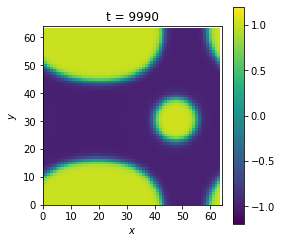

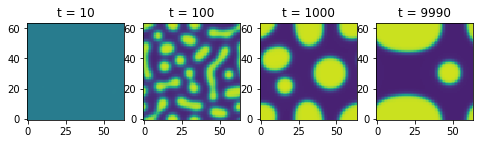

In [7]:
# run simulation for phi0 = -0.2
phi0 = -0.2
run()
#animate(phi_t)
plot(phi_t, 10, 100, 1000, 9990)

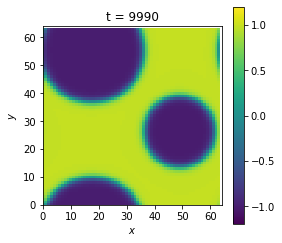

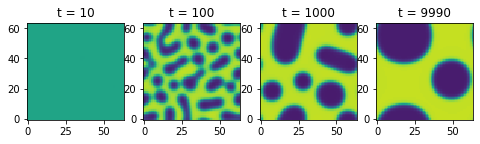

In [13]:
# run simulation for phi0 = 0.2
phi0 = 0.2
run()
#animate(phi_t)
plot(phi_t, 10, 100, 1000, 9990)

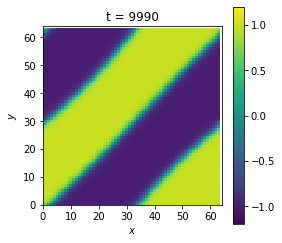

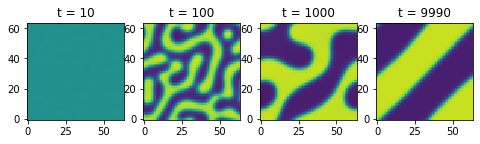

In [9]:
# run simulation for phi0 = 0.0
phi0 = 0.0
run()
#animate(phi_t)
plot(phi_t, 10, 100, 1000, 9990)